In [1]:
# Load the MNIST data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv("train.csv")

# print first 5 rows of d0
print(d0.head(5))

# save the labels into a variable l
l = d0["label"]

# Drop the label feature and store the pixel data in d
d = d0.drop("label", axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


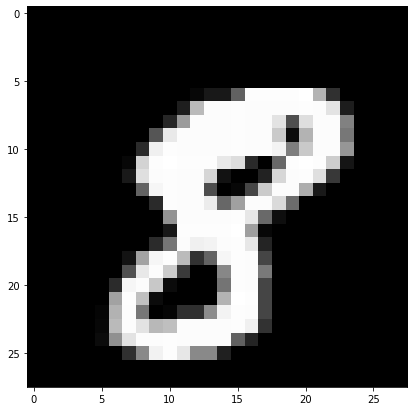

8


In [3]:
# display or plot a number
plt.figure(figsize=(7,7))
idx = 10
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation="none", cmap="gray")
plt.show()

print(l[idx])

In [4]:
# 2D Visualization using PCA
labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data: ", data.shape)

the shape of sample data:  (15000, 784)


In [5]:
# Data-preprocessing : Standardization
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [6]:
# Find the co-variance matrix : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print("The sahpe of covariance matrix = ", covar_matrix.shape)

The sahpe of covariance matrix =  (784, 784)


In [7]:
# Finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2-D space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# this code generates only the top two (782, 783) eigenvalues
# index starts at 0
values, vectors = eigh(covar_matrix, eigvals = (782, 783))

print("Shape of eigen vectors = ", vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [8]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print("Resultant new data points shape: ", vectors.shape, "X", sample_data.T.shape, " = ", new_coordinates.shape)

Resultant new data points shape:  (2, 784) X (784, 15000)  =  (2, 15000)


In [9]:
import pandas as pd

# appending label to the 2D projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for plotting the labeled points
dataframe = pd.DataFrame(data = new_coordinates, columns=("1st prin", "2nd prin", "label"))
print(dataframe.head())

   1st prin   2nd prin  label
0 -5.558661  -5.043558    1.0
1  6.193635  19.305278    0.0
2 -1.909878  -7.678775    1.0
3  5.525748  -0.464845    4.0
4  6.366527  26.644289    0.0


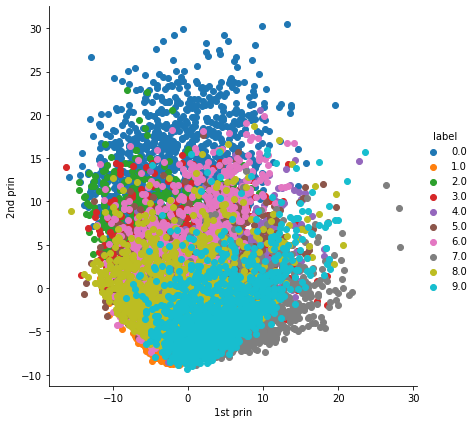

In [10]:
# plotting the 2d data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, "1st prin", "2nd prin").add_legend()
plt.show()

In [11]:
# PCA using scikit-learn
from sklearn import decomposition
pca = decomposition.PCA()

In [12]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_data will contain the 2D projects of simple data
print("shape of pca_data.shape = ", pca_data.shape)

shape of pca_data.shape =  (15000, 2)


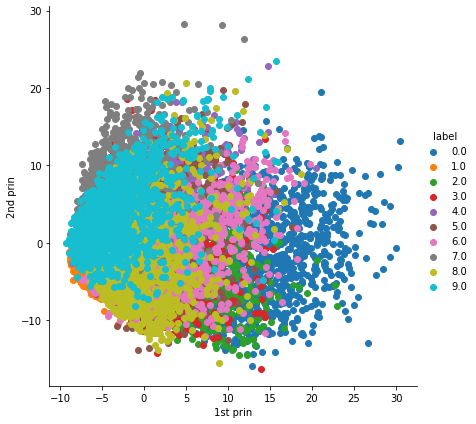

In [13]:
# attaching the label for each 2D data point
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new dataframe which help us in plotting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st prin", "2nd prin", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, "1st prin", "2nd prin").add_legend()
plt.show()

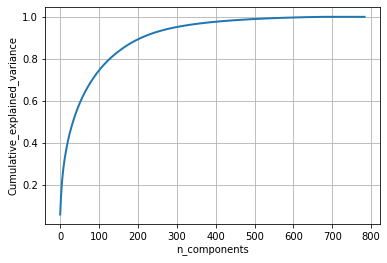

In [14]:
# PCA for dimensionality reduction (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis("tight")
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative_explained_variance")
plt.show()